In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading dataset
df=pd.read_excel('cadre.xlsx')

In [3]:
#display the first datapoints
df.head()

,Month,F
0,2006-1,990.0
1,2006-2,990.0
2,2006-3,998.0
3,2006-4,998.0
4,2006-5,999.0


In [4]:
#creating index column as date
df.index=pd.to_datetime(df.Month)

In [5]:
#checking the null values
df.isnull().sum()

Month    0
F        0
dtype: int64

In [6]:
# checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   204 non-null    object 
 1   F       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [7]:
# converting the month column to datetime format
df['Month']=pd.to_datetime(df['Month'])

In [8]:
# checking after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2006-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   204 non-null    datetime64[ns]
 1   F       204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [9]:
#set the month column as the inc
df.set_index('Month',inplace=True)

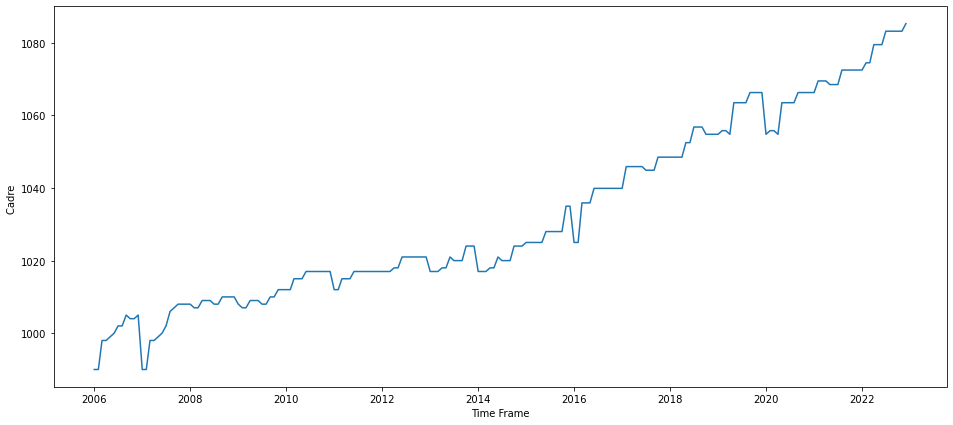

In [10]:
# data Exploration
plt.figure(figsize=(16,7))
fig=plt.figure(1)
am=fig.add_subplot(111)
am.set_xlabel('Time Frame')
am.set_ylabel('Cadre ')
am.plot(df['F'])

<AxesSubplot:xlabel='Month'>

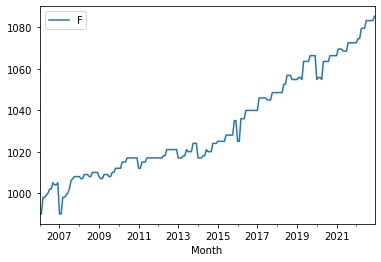

In [11]:
df.plot()

In [12]:
df.describe()

,F
count,204.000000
mean,1032.133824
std,24.851609
min,990.000000
25%,1012.000000
50%,1022.500000
75%,1054.800000
max,1085.300000


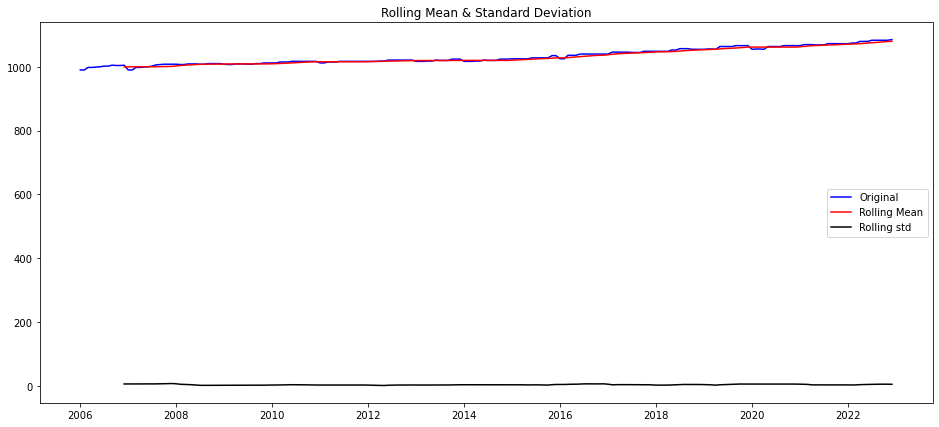

In [13]:
# determining the stationarity
rollmean = df.rolling(12).mean()
rollstd= df.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

orig=plt.figure(1)

#plot the rolling statistics
orig=plt.plot(df,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Implementing Augmented Dickey-Fuller test


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
passing_data=adfuller(df['F'])

In [16]:
# Defining function Dickey Fuller test
def adf_test(cadre):
    result=adfuller(cadre)
    labels=['Test parameters','p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print('Dataset is non-stationary')

In [17]:
# Checking the stationary
adf_test(df['F'])

Test parameters : 0.5668333469654614
p-value : 0.9867689489651645
#Lags Used : 2
Dataset observations : 201
Dataset is non-stationary


Found that the data is not stationary so we need to make it stationary

In [18]:
#Implementing the differencing
df['Differencing']=df['F']-df['F'].shift(1)

In [19]:
# checking the stationary afeter droping the null values 
adf_test(df['Differencing'].dropna())

Test parameters : -13.115087776932281
p-value : 1.6052553390234193e-24
#Lags Used : 1
Dataset observations : 201
Dataset is stationary


<AxesSubplot:xlabel='Month'>

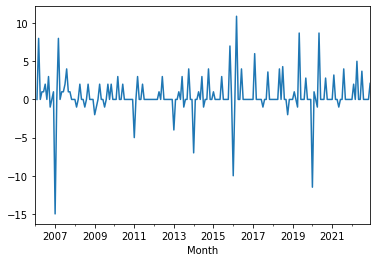

In [20]:
#plotting the new dataset
df['Differencing'].plot()

In [ ]:
#Implementing the ARIMA Model
# we need to find the p,d,q 
# Since we diffrentiated only once so d=1 , we need to find the p and q using 
# ACF plot(for q) and PACF plot (for p)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [22]:
plt.clf()
fig.clf()

<Figure size 432x288 with 0 Axes>

In [23]:
# plotting the ACF
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Differencing'].iloc[13:],lags=40,ax=ax1)

So we can consider q=2, as at point 2 its standing out , above cuts off the 
significance line (the blue shaded line )

In [24]:
fig.clf()

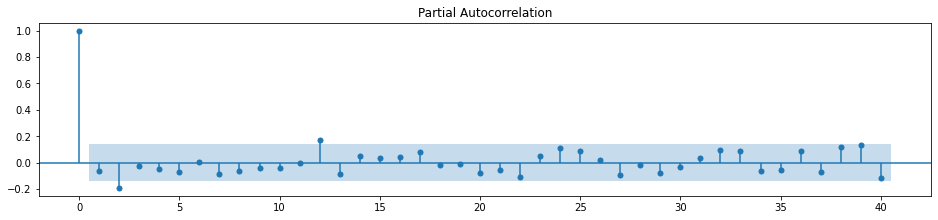

In [25]:
# plotting the PACF
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Differencing'].iloc[13:],lags=40,ax=ax2)
fig

So we can consider p=2, as at point 2 its standing out , above cuts off the 
significance line (the blue shaded line )

so p=2,d=1,q=2

In [26]:
#importing the ARIMA model
from statsmodels.tsa.arima_model import ARIMA


In [27]:
# we initialize the model
model=ARIMA(df['F'],order=(2,1,2))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [28]:
# Training the ARIMA Model
arima_model=model.fit()

<AxesSubplot:xlabel='Month'>

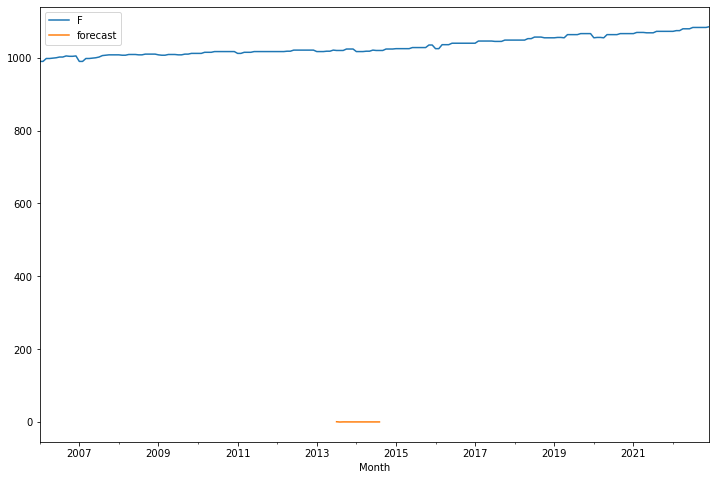

In [29]:
df['forecast']=arima_model.predict(start=90,end=103,dynamic=True)
df[['F','forecast']].plot(figsize=(12,8))

Our model is not performing well as there is big difference between actual and prediction. So we need to apply for SARIMA model

In [31]:
# we initialize the SARIMA model
model=sm.tsa.statespace.SARIMAX(df['F'],order=(2,1,2),seasonal_order=(2,1,2,12))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
# Training the model
sarima_model=model.fit()

<AxesSubplot:xlabel='Month'>

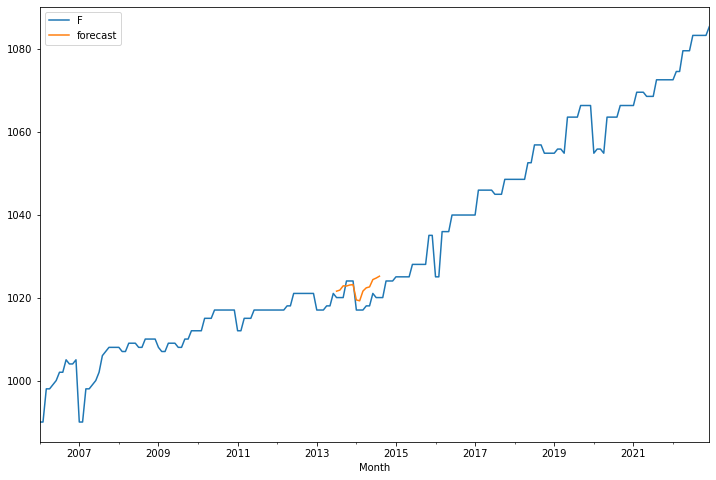

In [33]:
df['forecast']=sarima_model.predict(start=90,end=103,dynamic=True)
df[['F','forecast']].plot(figsize=(12,8))